This notebook reproduces experiments with the second DCE dataset described in "Extreme MRI: Large-Scale Volumetric Dynamic Imaging from Continuous Non-Gated Acquisitions".

# Import packages

The reconstruction depends on SigPy.

In [2]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
from gridding_recon import gridding_recon
from multi_scale_low_rank_recon import MultiScaleLowRankRecon

# Set computing device

We can specify the computing device with their device IDs.
For CPU, the id is -1.

We strongly recommend using GPUs for reconstruction.

In [3]:
device = 0

# Load dataset

In [4]:
ksp = np.load('data/dce/ksp.npy')
coord = np.load('data/dce/coord.npy')
dcf = np.load('data/dce/dcf.npy')

# Perform gridding reconstruction.

In [6]:
grd = gridding_recon(ksp, coord, dcf, device=device)

<IPython.core.display.Javascript object>


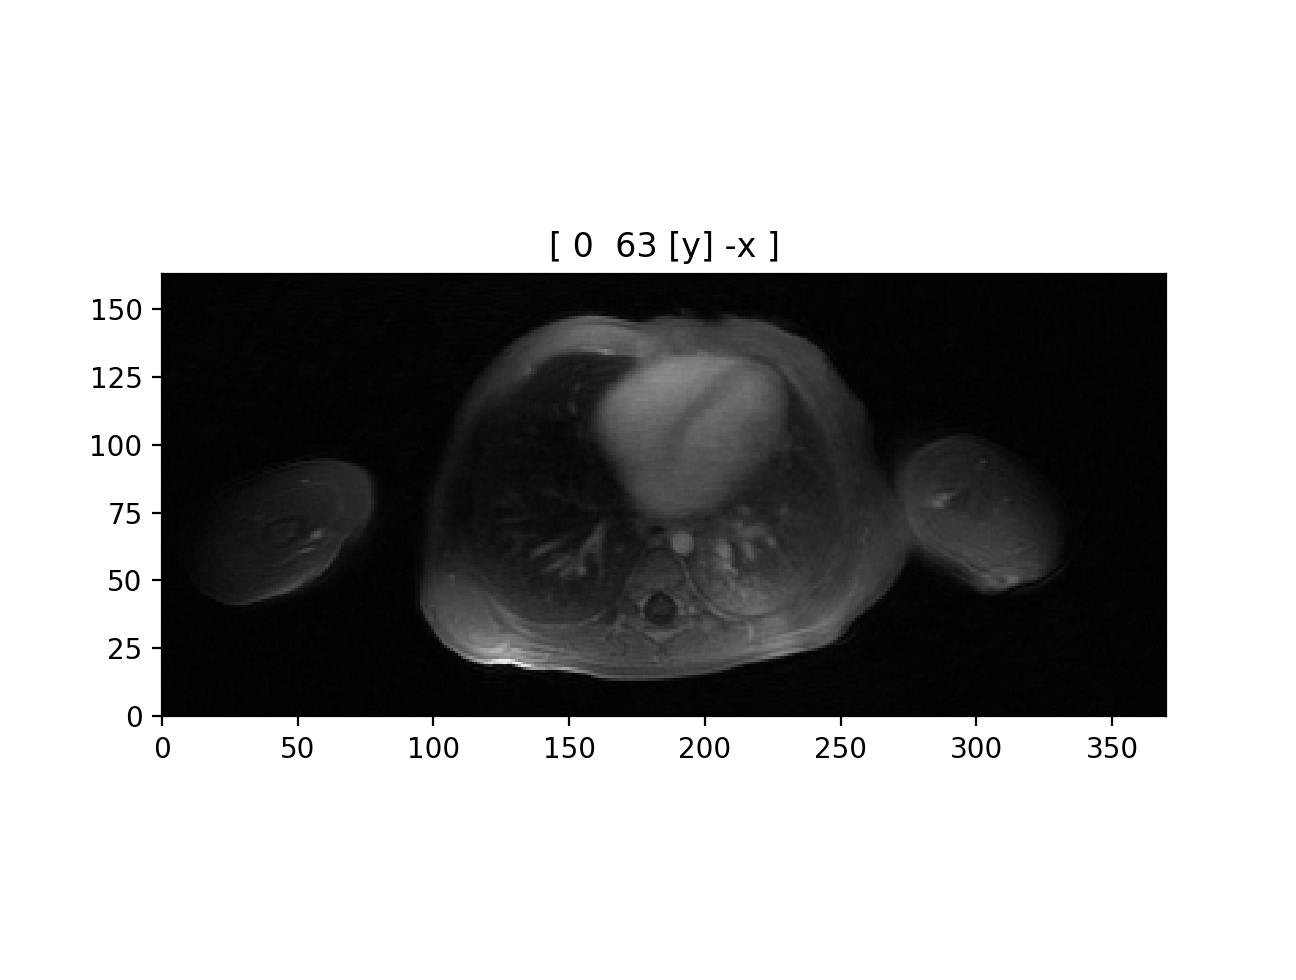

In [7]:
#Plot
pl.ImagePlot(grd)

# Generate Sensitivity Maps

In [5]:
mps = mr.app.JsenseRecon(ksp, coord=coord, weights=dcf, device=device).run()

<IPython.core.display.Javascript object>


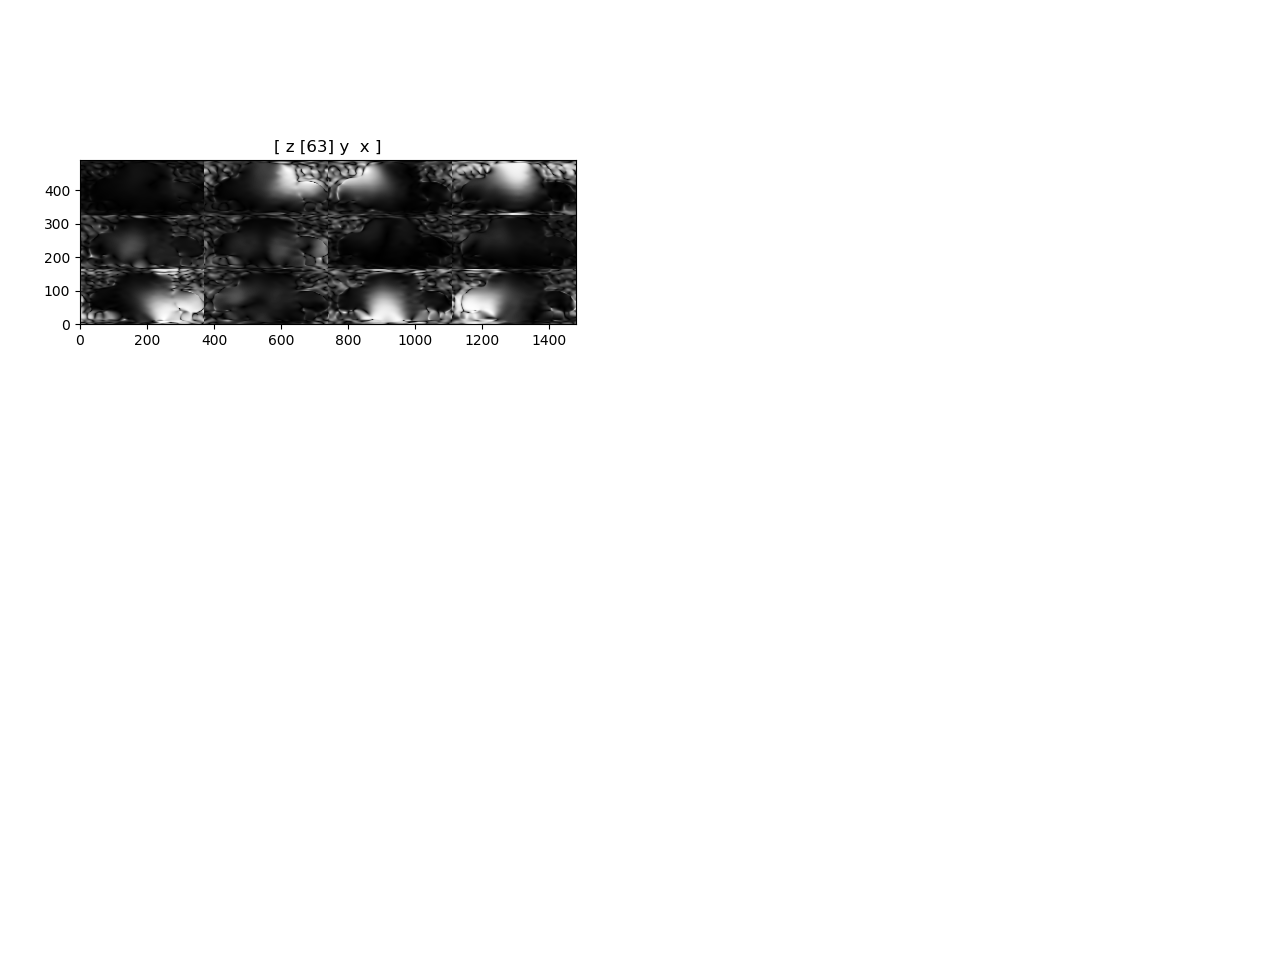

In [6]:
# Plot
pl.ImagePlot(mps, z=0)

# Perform Multi-scale Low Rank Reconstruction with 20 frames

In [9]:
T = 20
lamda = 1e-8
img = MultiScaleLowRankRecon(ksp, coord, dcf, mps, T, lamda, device=device, max_epoch=3).run()



Reconstruction diverged. Restart with alpha=10.8.


<IPython.core.display.Javascript object>


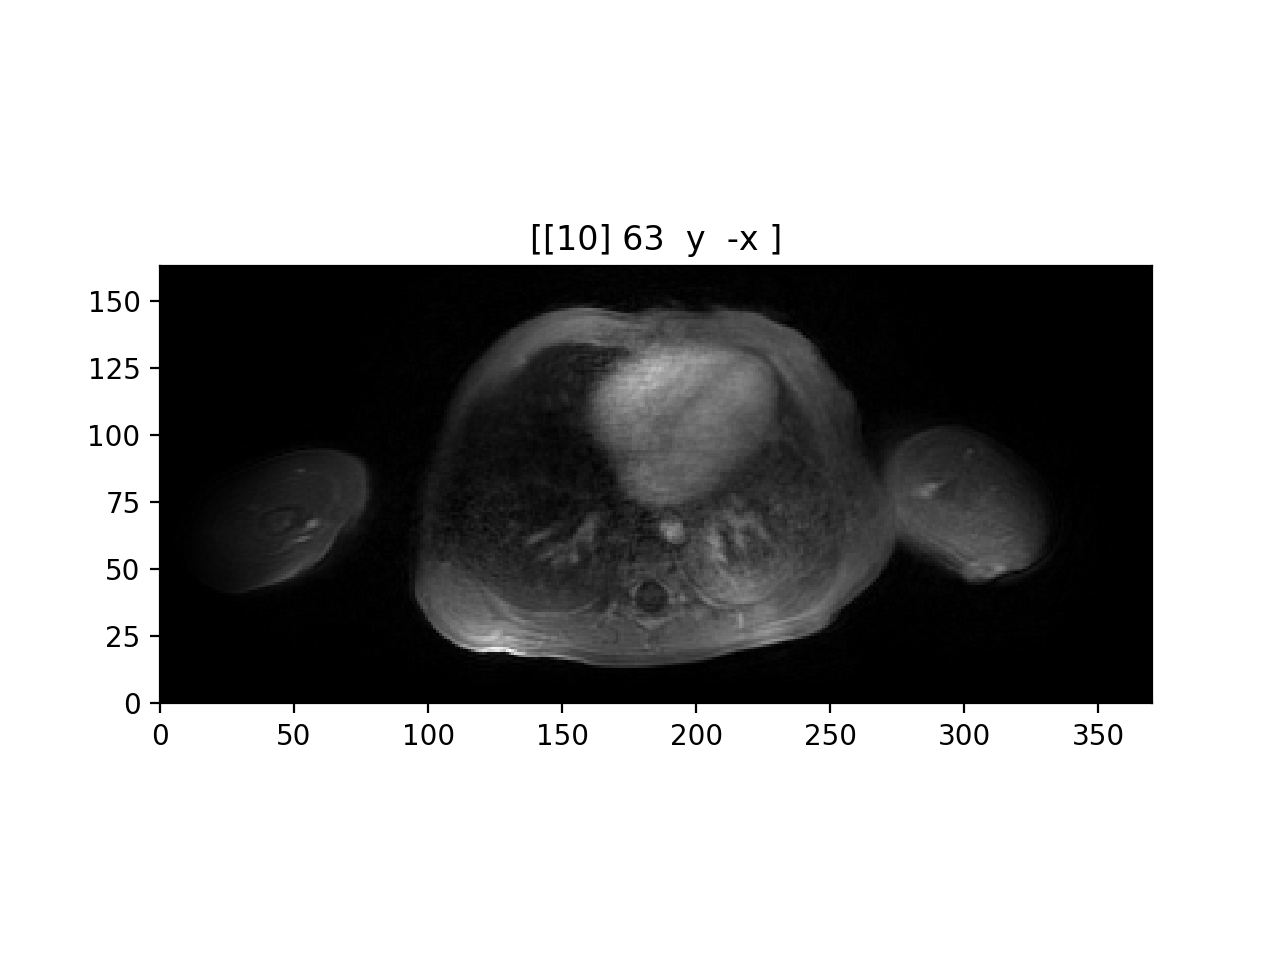

In [12]:
# Plot
img.use_device(0)
pl.ImagePlot(img)